In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("Set1")

In [10]:
sp500 = yf.download('^GSPC', start='1990-01-01', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
n = 10
sp500rets = sp500['Adj Close'].pct_change().dropna()
buy_and_hold = ((1 + sp500rets).cumprod() - 1) * 100
miss_n_best = ((1 + sp500rets.drop(sp500rets.nlargest(n).index)).cumprod() - 1) * 100
miss_n_worst = ((1 + sp500rets.drop(sp500rets.nsmallest(n).index)).cumprod() - 1) * 100

In [12]:
print(f'annualized mean sp500: {sp500rets.mean() * 360 * 100:.2f}')
print(f'annualized sdt sp500: {sp500rets.std() * 60 * 100:.2f}')

annualized mean sp500: 12.85
annualized sdt sp500: 68.82


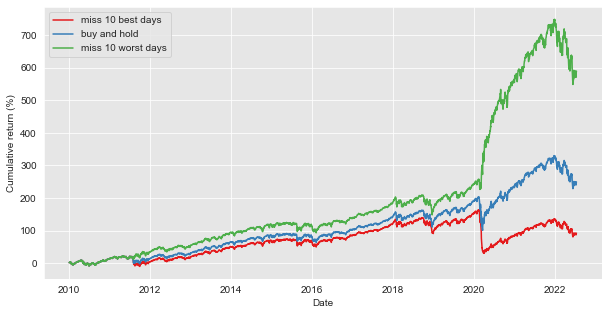

In [34]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x=miss_n_best.index, y=miss_n_best.values)
sns.lineplot(x=buy_and_hold.index, y=buy_and_hold.values)
sns.lineplot(x=miss_n_worst.index, y=miss_n_worst.values)
plt.legend(labels=[f"miss {n} best days", "buy and hold", f"miss {n} worst days"])
plt.ylabel('Cumulative return (%)')
plt.savefig('cumrets.png')

In [35]:
def get_intraday_and_overnight_graph(ticker, start):
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    idx = yf.download(ticker, start=start, interval='1d')
    
    overnight = (idx['Open'].iloc[1:].values - idx['Close'].iloc[:-1].values) / idx['Close'].iloc[:-1].values
    overnight = pd.DataFrame(data=overnight, index=idx.index[1:], columns=['ret'])
    overnight.ret = ((1 + overnight).cumprod() - 1) * 100
    
    intraday = (idx['Close'] - idx['Open']) / idx['Open']
    intraday = pd.DataFrame(data=intraday, index=idx.index, columns=['ret'])
    intraday.ret = ((1 + intraday).cumprod() - 1) * 100
    
    hodl = idx['Adj Close'].pct_change()
    hodl = ((1 + hodl).cumprod() - 1) * 100
    
    sns.lineplot(x=hodl.index, y=hodl.values, ax=ax)
    sns.lineplot(x=overnight.index, y=overnight.ret, ax=ax)
    sns.lineplot(x=intraday.index, y=intraday.ret, ax=ax)
    ax.legend(labels=["hodl", "overnight", "intraday"])
    ax.set_ylabel('Return (%)')
    plt.show()

[*********************100%***********************]  1 of 1 completed


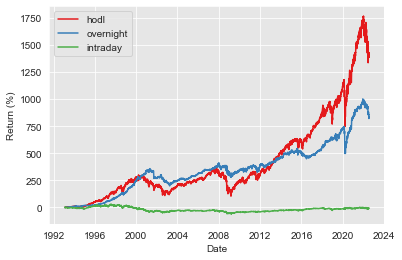

In [36]:
get_intraday_and_overnight_graph('SPY', '1992-01-01')

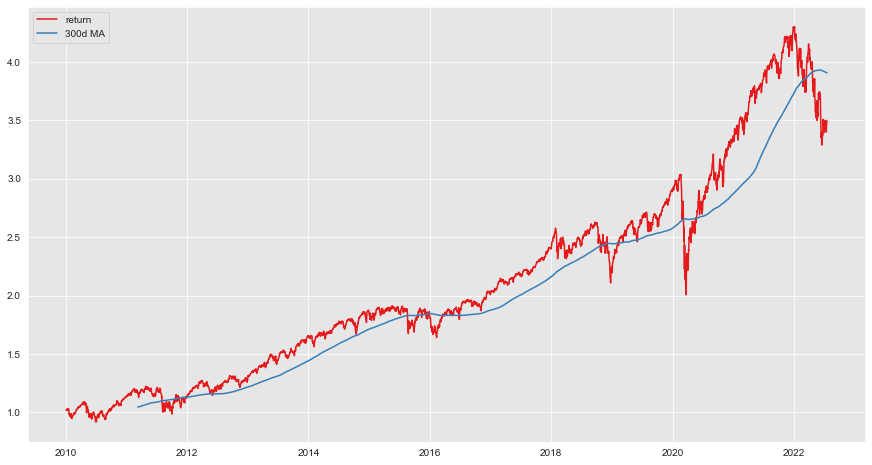

In [41]:
rets = (1 + sp500['Adj Close'].pct_change()).cumprod()
n = 300

fig = plt.figure(figsize=(15,8))

plt.plot(rets, label='return')
plt.plot(rets.rolling(n).mean(), label=f'{n}d MA')
plt.legend()